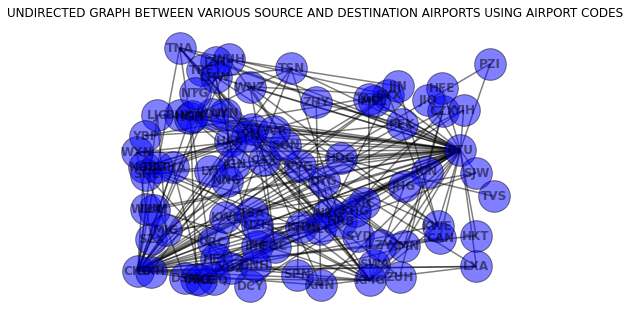

Degree of each airport codes:  [('CTU', 54), ('CKG', 37), ('KMG', 17), ('XIY', 15), ('HRB', 14), ('SYX', 10), ('HGH', 8), ('NKG', 8), ('TNA', 8), ('KWE', 8), ('CGO', 7), ('CSX', 7), ('NGB', 7), ('SHE', 7), ('TSN', 6), ('LHW', 6), ('TYN', 6), ('WUH', 6), ('XNN', 6), ('XMN', 6), ('XUZ', 6), ('URC', 5), ('DLC', 5), ('HAK', 5), ('LXA', 5), ('WNZ', 5), ('CGQ', 4), ('CZX', 4), ('INC', 4), ('KHN', 4), ('NNG', 4), ('PEK', 4), ('WXN', 4), ('MIG', 4), ('CAN', 3), ('LJG', 3), ('PVG', 3), ('SZX', 3), ('YIH', 3), ('HKG', 3), ('SJW', 3), ('KWL', 3), ('SPN', 2), ('DYG', 2), ('HKT', 2), ('PZI', 2), ('TSA', 2), ('WUX', 2), ('ZHA', 2), ('FOC', 2), ('DSN', 2), ('JHG', 2), ('KOW', 2), ('LUM', 2), ('TAO', 2), ('ZUH', 2), ('GXH', 2), ('JJN', 2), ('ZHY', 2), ('YBP', 2), ('BHY', 1), ('SWA', 1), ('SYD', 1), ('DCY', 1), ('HDG', 1), ('HET', 1), ('HFE', 1), ('ICN', 1), ('JIQ', 1), ('JZH', 1), ('LZY', 1), ('MEL', 1), ('XIC', 1), ('YTY', 1), ('DAT', 1), ('DNH', 1), ('NZH', 1), ('JGN', 1), ('KHG', 1), ('TPE', 1), ('

In [4]:
import os
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

#Code for Data Reduction and finding the reduced file
if os.path.exists('AL35_data.txt'):
  os.remove('AL35_data.txt')

#For loop which iterates through the entire census-data-sample
for line in open('routes_v3.txt', 'r'):
  #condition check for the presence of AL35 character in a line
  if "AL35," in line:  
  #code block for entering data into eliminated-data.data file
    dataFile = open('AL35_data.txt', 'a')
    dataFile.write(line)
    dataFile.close()




#Code for constructing a graph data structure to find connections between airports using airport codes

#Creating a key value zip for source and destionation codes
SourceDestinationZip = []

#creating a list of sourceairport lists and destination airport lists to remove duplicates and contruct zip
sourcecodeportlist = []
destinationcodeportlist = []

#constructing dataframe from the text file in which airlines data is present
AL35_dataframe = pd.read_csv('AL35_data.txt',names=['Airline Code', 'Airline ID', 'SourceAirport Code', 'SourceAirport ID', 'DestinationAirport Code', 'DestinationAirport ID', 'CodeShare', 'NumberOfStops','Equipment'])

#Fetching the destination airport codes column and putting it in a list
DestinationList = AL35_dataframe["DestinationAirport Code"].tolist()

#Fetching the source airport codes column and putting it in a list
SourceList = AL35_dataframe["SourceAirport Code"].tolist()
for k in zip(SourceList, DestinationList):
  SourceDestinationZip.append(k)


#code for removing duplicates in the source airports and destination airports
for sourceportcode in SourceDestinationZip:
  for destinationportcode in SourceDestinationZip:    
    if sourceportcode==destinationportcode[::-1]:
      SourceDestinationZip.remove(destinationportcode)
    else:
      sourcecodeportlist.append(sourceportcode[0])
      destinationcodeportlist.append(sourceportcode[1])



sourcedestination_dataframe = pd.DataFrame({ 'from':sourcecodeportlist, 'to':destinationcodeportlist})

#constructing graphs using networkx library
G=nx.from_pandas_edgelist(sourcedestination_dataframe, 'from', 'to', create_using=nx.Graph() )
nx.draw_random(G, with_labels=True,  alpha=0.5, arrows=False, node_size=1000, node_color='blue', font_weight='bold',width=1.5, edgecolors='black')
plt.title("UNDIRECTED GRAPH BETWEEN VARIOUS SOURCE AND DESTINATION AIRPORTS USING AIRPORT CODES")
plt.show()




##code to find the top 10 airports with highest Degree centrality
def find_airports_with_highest_degreeCentrality(G):    
    degreeCentrality = nx.degree_centrality(G)

    # Compute the maximum degree centrality: max
    max_1 = max(list(degreeCentrality.values()))
    max_2 = list(sorted(degreeCentrality.values()))[-2]
    max_3 = list(sorted(degreeCentrality.values()))[-3]
    max_4 = list(sorted(degreeCentrality.values()))[-4]
    max_5 = list(sorted(degreeCentrality.values()))[-5]
    max_6 = list(sorted(degreeCentrality.values()))[-6]
    max_7 = list(sorted(degreeCentrality.values()))[-7]
    max_8 = list(sorted(degreeCentrality.values()))[-8]
    max_9 = list(sorted(degreeCentrality.values()))[-9]
    max_10 = list(sorted(degreeCentrality.values()))[-10]

    #intiliase sets to collect airport codes of same degree centrality
    airport_max1 = set()
    airport_max2 = set()
    airport_max3 = set()
    airport_max4 = set()
    airport_max5 = set()
    airport_max6 = set()
    airport_max7 = set()
    airport_max8 = set()
    airport_max9 = set()
    airport_max10 = set()

    # Iterate over the degree centrality dictionary
    for k, v in degreeCentrality.items():
       #condition check if current value equals the degree centrality
        if v == max_1:
            airport_max1.add(k)
        if v == max_2:
            airport_max2.add(k)
        if v == max_3:
            airport_max3.add(k)
        if v == max_4:
            airport_max4.add(k)
        if v == max_5:
            airport_max5.add(k)
        if v == max_6:
            airport_max6.add(k)
        if v == max_7:
            airport_max7.add(k)
        if v == max_8:
            airport_max8.add(k)
        if v == max_9:
            airport_max9.add(k)
        if v == max_10:           
            airport_max10.add(k)

    return airport_max1,airport_max2,airport_max3,airport_max4,airport_max5,airport_max6,airport_max7,airport_max8,airport_max9, airport_max10




##code to find the top 10 airports with highest closeness degree centrality
def find_airports_with_highest_closenessdegreeCentrality(G):    
    degreeCentrality = nx.closeness_centrality(G)

    # Compute the maximum degree centrality: max
    max_1 = max(list(degreeCentrality.values()))
    max_2 = list(sorted(degreeCentrality.values()))[-2]
    max_3 = list(sorted(degreeCentrality.values()))[-3]
    max_4 = list(sorted(degreeCentrality.values()))[-4]
    max_5 = list(sorted(degreeCentrality.values()))[-5]
    max_6 = list(sorted(degreeCentrality.values()))[-6]
    max_7 = list(sorted(degreeCentrality.values()))[-7]
    max_8 = list(sorted(degreeCentrality.values()))[-8]
    max_9 = list(sorted(degreeCentrality.values()))[-9]
    max_10 = list(sorted(degreeCentrality.values()))[-10]

    #intiliase sets to collect airport codes of same closeness degree centrality
    airport_max1 = set()
    airport_max2 = set()
    airport_max3 = set()
    airport_max4 = set()
    airport_max5 = set()
    airport_max6 = set()
    airport_max7 = set()
    airport_max8 = set()
    airport_max9 = set()
    airport_max10 = set()

    # Iterate over the closeness degree centrality dictionary
    for k, v in degreeCentrality.items():
       #condition check if current value equals the closeness degree centrality
        if v == max_1:
            airport_max1.add(k)
        if v == max_2:
            airport_max2.add(k)
        if v == max_3:
            airport_max3.add(k)
        if v == max_4:
            airport_max4.add(k)
        if v == max_5:
            airport_max5.add(k)
        if v == max_6:
            airport_max6.add(k)
        if v == max_7:
            airport_max7.add(k)
        if v == max_8:
            airport_max8.add(k)
        if v == max_9:
            airport_max9.add(k)
        if v == max_10:           
            airport_max10.add(k)

    return airport_max1,airport_max2,airport_max3,airport_max4,airport_max5,airport_max6,airport_max7,airport_max8,airport_max9, airport_max10



#code to find the top 10 airports with highest betweenness degree centrality
def find_airports_with_highest_BetweenessdegreeCentrality(G):    
    degreeCentrality = nx.betweenness_centrality(G)

    # Compute the maximum degree centrality: max
    max_1 = max(list(degreeCentrality.values()))
    max_2 = list(sorted(degreeCentrality.values()))[-2]
    max_3 = list(sorted(degreeCentrality.values()))[-3]
    max_4 = list(sorted(degreeCentrality.values()))[-4]
    max_5 = list(sorted(degreeCentrality.values()))[-5]
    max_6 = list(sorted(degreeCentrality.values()))[-6]
    max_7 = list(sorted(degreeCentrality.values()))[-7]
    max_8 = list(sorted(degreeCentrality.values()))[-8]
    max_9 = list(sorted(degreeCentrality.values()))[-9]
    max_10 = list(sorted(degreeCentrality.values()))[-10]

    #intiliase sets to collect airport codes of same degree centrality
    airport_max1 = set()
    airport_max2 = set()
    airport_max3 = set()
    airport_max4 = set()
    airport_max5 = set()
    airport_max6 = set()
    airport_max7 = set()
    airport_max8 = set()
    airport_max9 = set()
    airport_max10 = set()

    # Iterate over the degree centrality dictionary
    for k, v in degreeCentrality.items():
       #condition check if current value equals the degree centrality
        if v == max_1:
            airport_max1.add(k)
        if v == max_2:
            airport_max2.add(k)
        if v == max_3:
            airport_max3.add(k)
        if v == max_4:
            airport_max4.add(k)
        if v == max_5:
            airport_max5.add(k)
        if v == max_6:
            airport_max6.add(k)
        if v == max_7:
            airport_max7.add(k)
        if v == max_8:
            airport_max8.add(k)
        if v == max_9:
            airport_max9.add(k)
        if v == max_10:           
            airport_max10.add(k)

    return airport_max1,airport_max2,airport_max3,airport_max4,airport_max5,airport_max6,airport_max7,airport_max8,airport_max9, airport_max10




#Code to identify top 5 airport codes with a greater number of connections

#prints the degrees of each airport code in a sorted order
print("Degree of each airport codes: ", sorted(G.degree, key=lambda x: x[1], reverse=True))

print("Degree Centrality Order: ",find_airports_with_highest_degreeCentrality(G))
print("Closeness Degree Centrality Order: ",find_airports_with_highest_closenessdegreeCentrality(G))
print("Betweenness Degree Centrality Order: ",find_airports_with_highest_BetweenessdegreeCentrality(G))



